### Import package

In [16]:
import TopoSPAM as TopoSPAM
from TopoSPAM.mesh_methods import *
%matplotlib inline
TopoSPAM.set_repo_path('/Users/krishna/PhD/TopoSPAM')

Success: The path '/Users/krishna/PhD/TopoSPAM' contains the TopoSPAM repository.


### Initialize mesh and parameters

In [17]:
Params = TopoSPAM.SpringLatticeParameters()

In [18]:
Params.thickness = 0.1 #currently the thickness does not update, it is hardcoded to some value somewhere in topospam
Params.mesh_geometry = "circle"
Params = TopoSPAM.load_mesh(Params)

## Initialize strain pattern

We implement strain using a spontaneous strain tensor $\underline{\underline{\lambda}}$. This $\underline{\underline{\lambda}}$ is second rank tensor, consisting of nine elements. For this notebook, we use $\underline{\underline{\lambda}}$ with only the diagonal terms being non-zero. This means that you can implement spontaneous strains in the principal directions. Hence, let us write $\underline{\underline{\lambda}} = (\lambda_1, \lambda_2, \lambda_3)$, where $\lambda_1$ and $\lambda_2$ are strains along the two in-surface principal directions and $\lambda_3$ is along the thickness of the surface. Each of the $\lambda_i$ should be a function of $x_1, x_2$ which are the in-surface coordinates.

In [19]:
Params.nematic_coordinates = "polar" #x1: radial, x2: angular
# Params.nematic_coordinates = "cartesian" #x1: x, x2: y

def lambda1(x1,x2):
    return 1.3 # + 0.3*x1**2 #+ 0.2*x1**2
def lambda2(x1,x2): 
    return 1.3 #+ 0.2*x1**2 #+ 0.2*x1**2
def lambda3(x1,x2):
    return 1

Params.lambda_tensor_diagonal = [lambda1,lambda2,lambda3]

Params = TopoSPAM.load_strain_pattern(Params)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Strain Pattern'}>)

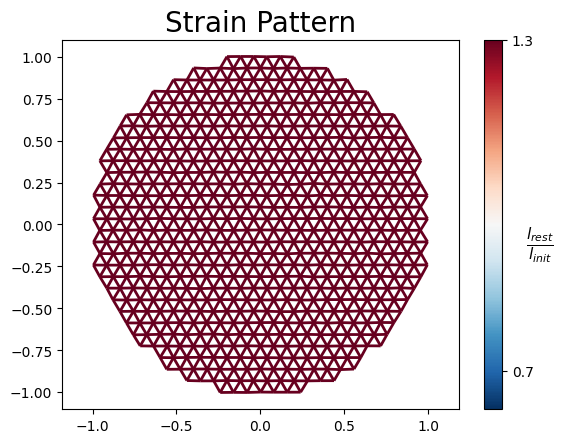

In [20]:
springs = Params.springs
Params.springs = springs
TopoSPAM.visualize(Params, state="initial", color_max=0.7, color_min=1.3,)

## --- Works till here --

### Perform the simulation

In [21]:

#add noise
import numpy as np
np.random.seed(0)
Params = TopoSPAM.add_noise(Params, noise = 0.01)
#perform simulation
Params = TopoSPAM.RunSpringLatticeSimulation(Params, tol=1e-6, csv_t_save=10)

Implementing external forces
$$$$$$$ Running openfpm $$$$$$$
make: `SpringLattice' is up to date.
dt 0.01
save_csv 1000
save_vtk 0
dim 4.01648
tol 1e-06
PARMETIS ERROR: Poor initial vertex distribution. Processor 0 has no vertices assigned to it!
TIME step: 0
Avg movement: 0.000758415


/usr/local/opt/openfpm/openfpm_pdata/include/Decomposition/Distribution/parmetis_util.hpp:232 Error detected invalid installation of Parmetis. OpenFPM support Parmetis/Metis version with 64 bit idx_t
Stack trace deactivated, use #define PRINT_STACKTRACE to activate


TIME step: 10
Avg movement: 4.62827e-05
TIME step: 20
Avg movement: 3.54082e-05
TIME step: 30
Avg movement: 2.63085e-05
TIME step: 40
Avg movement: 1.93661e-05
TIME step: 50
Avg movement: 1.41916e-05
TIME step: 60
Avg movement: 1.03691e-05
TIME step: 70
Avg movement: 7.56005e-06
TIME step: 80
Avg movement: 5.5033e-06
TIME step: 90
Avg movement: 4.00168e-06
TIME step: 100
Avg movement: 2.90776e-06
TIME step: 110
Avg movement: 2.11217e-06
TIME step: 120
Avg movement: 1.53427e-06
TIME step: 130
Avg movement: 1.11491e-06
$$$$ Exit OpenFPM $$$$


### Visualize the results

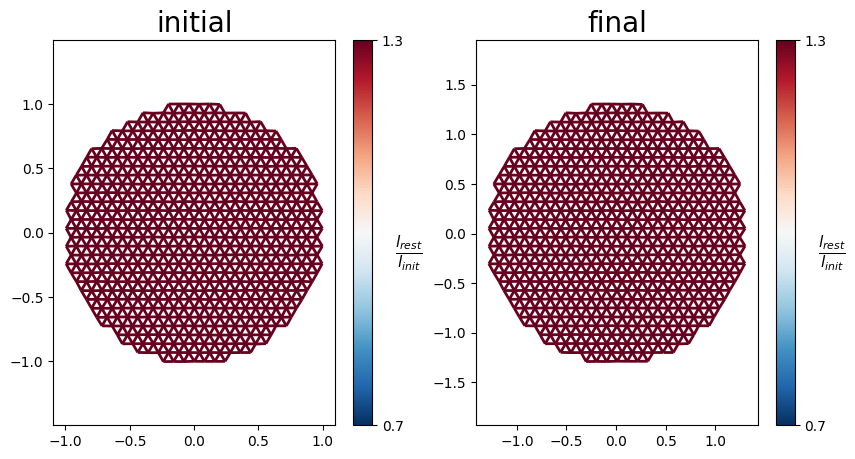

In [23]:
#visualize the pattern
%matplotlib inline
fig,axs = plt.subplots(1,2,figsize=(10,5))

fig,axs[0] = TopoSPAM.visualize(Params,ax = axs[0], fig = fig, mode = "discrete", state = "initial", x = "x", y = "y", title = "initial")
fig,axs[1] = TopoSPAM.visualize(Params,ax = axs[1], fig = fig, mode = "discrete", state = "final", x = "x", y = "y", title = "final")